This file is part of BrainMolecularAtlas.

Copyright (c) 2021-2022 Blue Brain Project/EPFL 

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.
This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt

import timeit
import numpy as np
from collections import Counter

from numpy.random import seed
from numpy.random import randint
from scipy.stats import ks_2samp
from scipy.stats import levene
from scipy.stats import fligner
from scipy.stats import kruskal
import scikit_posthocs as sp

import scipy.stats as ss
from scipy.stats import mannwhitneyu


import pickle as pkl

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
from helper_functions import (
    split_df_column_list_to_multiple_rows
)


In [6]:
# We also use functions from https://github.com/gcalmettes/bootstrap-tools/blob/master/code/bootstrap_routines.py 
# Copyright 2012 gcalmettes (gcalmettes@ucla.edu), BSD-style copyright and disclaimer apply
#!/usr/local/bin/python

from bootstrap_routines import (
    bootstrap,
    bootci,
    bootci_diff,
    bootpv
)

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
sns.set_style('whitegrid',{'axes.grid':False})

In [4]:
#with open('../data/5_2_df_commMedMouseHKG.pkl','rb') as f:
with open('../data/6_df_processed.pkl','rb') as f:
    df = pkl.load(f)
print(len(df))
df["log_conc_uM_medNorm"]  = df["log_conc_uM_medNorm"].astype('float64')

df = df.reset_index(drop=True)

df['exp_conc'] = np.exp(df['log_conc_uM_medNorm'])


2131244


In [5]:
df = df.loc[(df['condition'].isin(['young', 'adult',  'control',  'WT','SORT'])) | (df['condition'].isna())]

df = df.reset_index(drop=True)

In [7]:
for st in df['Study'].unique()[0:13]:
    print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

Itzhak 2017 (-2.374861837569407, -2.248318929438213)
Wisniewski 2015 (-2.349131100641647, -2.262286357336059)
Bai 2020 (-2.3206589344365023, -2.2855388227348747)
Hasan 2020 (-2.3318991876629127, -2.307602912114988)
Geiger 2013 (-2.348589949670391, -2.2654254621786154)
Kjell 2020 (-2.328599176016368, -2.2900172009946074)
Fecher 2019 (-2.323001717761638, -2.2934626550868726)
Guergues 2019 (-2.3500671870063816, -2.267658882283363)
Hamezah 2019 (-2.3508954120198577, -2.238207825980079)
McKetney 2019 (-2.3544346018206284, -2.3147122977509444)
Hamezah 2018 (-2.36908179848606, -2.2531007792829003)
Krogager 2018 (-2.382604316746141, -2.2290521998783124)
Zhu 2018 (-2.345090755339668, -2.2670682447506154)


In [8]:
st = df['Study'].unique()[13]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

Carlyle 2017 (-2.3239124915125986, -2.294932868508225)


In [9]:
st = df['Study'].unique()[14]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[15]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[16]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[17]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[18]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[19]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[20]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[21]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[22]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[23]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

st = df['Study'].unique()[24]
print(st, bootci(df.loc[df['Study']==st,"log_conc_uM_medNorm"], stat=np.median, alpha=0.05))

Sharma 2015, isolated (-2.3237507260959602, -2.2933360279698976)
Sharma 2015, cultured (-2.320673793858662, -2.296984029870605)
Han 2014 (-2.331846663172352, -2.2856986183761463)
Davis 2019 (-2.3393428218414085, -2.2780722869860606)
Chuang 2018 (-2.3547898542629895, -2.2641306368850653)
Fornasiero 2018 (-2.4870044958628776, -2.1220985104581347)
Hosp 2017, insoluble (-2.3354814198676053, -2.283506158973301)
Hosp 2017, soluble (-2.319026639739367, -2.2983641916526754)
Hosp 2017, CSF (-2.4093642905249606, -2.2330028704349267)
Beltran 2016 (-2.3725392994348624, -2.203739047698871)
Duda 2018 (-2.4160850544723473, -2.1709330809979948)


In [7]:
# KW + Conover + Holm FWER

#If Kruskal-Wallis gives significant difference between the groups -> pairwise comparisons or contrasts to point the differences 
#It is important to reduce familywise Type I error.

data = [df.loc[ids, 'log_conc_uM_medNorm'].values for ids in df.groupby('Study').groups.values()]
H, p = ss.kruskal(*data)
print("H = ", H, "p-value = ", p)
studies_log_conover_holm = sp.posthoc_conover(df, val_col='log_conc_uM_medNorm', group_col='Study', p_adjust = 'holm')


H =  1034.5475477585828 p-value =  4.073241676005487e-203


In [12]:
custom_dict = {'Itzhak 2017':0,
               'Wisniewski 2015':1,
              'Bai 2020':2,
              'Hasan 2020':3,
              'Geiger 2013':4,
              'Kjell 2020':5,
              'Fecher 2019':6,
              'Guergues 2019':7,
              'Hamezah 2019':8,
              'McKetney 2019':9,
              'Hamezah 2018':10,
              'Krogager 2018':11,
              'Zhu 2018':12,
              'Carlyle 2017':13,
              'Sharma 2015, isolated':14,
              'Sharma 2015, cultured':15,
              'Han 2014':16,
              'Davis 2019':17,
              'Chuang 2018':18,
              'Fornasiero 2018':19,
              'Hosp 2017, insoluble':20,
              'Hosp 2017, soluble':21,
              'Hosp 2017, CSF':22,
              'Beltran 2016':23,
              'Duda 2018':24}   

In [13]:
list(custom_dict.keys())

['Itzhak 2017',
 'Wisniewski 2015',
 'Bai 2020',
 'Hasan 2020',
 'Geiger 2013',
 'Kjell 2020',
 'Fecher 2019',
 'Guergues 2019',
 'Hamezah 2019',
 'McKetney 2019',
 'Hamezah 2018',
 'Krogager 2018',
 'Zhu 2018',
 'Carlyle 2017',
 'Sharma 2015, isolated',
 'Sharma 2015, cultured',
 'Han 2014',
 'Davis 2019',
 'Chuang 2018',
 'Fornasiero 2018',
 'Hosp 2017, insoluble',
 'Hosp 2017, soluble',
 'Hosp 2017, CSF',
 'Beltran 2016',
 'Duda 2018']

In [14]:
studies_log_conover_holm = studies_log_conover_holm[['Itzhak 2017',
 'Wisniewski 2015',
 'Bai 2020',
 'Hasan 2020',
 'Geiger 2013',
 'Kjell 2020',
 'Fecher 2019',
 'Guergues 2019',
 'Hamezah 2019',
 'McKetney 2019',
 'Hamezah 2018',
 'Krogager 2018',
 'Zhu 2018',
 'Carlyle 2017',
 'Sharma 2015, isolated',
 'Sharma 2015, cultured',
 'Han 2014',
 'Davis 2019',
 'Chuang 2018',
 'Fornasiero 2018',
 'Hosp 2017, insoluble',
 'Hosp 2017, soluble',
 'Hosp 2017, CSF',
 'Beltran 2016',
 'Duda 2018']]

studies_log_conover_holm = studies_log_conover_holm.reindex(custom_dict.keys())

studies_log_conover_holm.head()

,Itzhak 2017,Wisniewski 2015,Bai 2020,Hasan 2020,Geiger 2013,Kjell 2020,Fecher 2019,Guergues 2019,Hamezah 2019,McKetney 2019,Hamezah 2018,Krogager 2018,Zhu 2018,Carlyle 2017,"Sharma 2015, isolated","Sharma 2015, cultured",Han 2014,Davis 2019,Chuang 2018,Fornasiero 2018,"Hosp 2017, insoluble","Hosp 2017, soluble","Hosp 2017, CSF",Beltran 2016,Duda 2018
Itzhak 2017,-1.000000e+00,1.086499e-01,4.501244e-19,1.000000e+00,1.000000e+00,4.000020e-11,2.939990e-04,1.000000e+00,3.334687e-09,6.059570e-03,2.085066e-04,0.015090,8.672159e-01,7.332166e-03,3.773996e-10,2.149922e-04,7.643383e-02,1.717551e-01,1.000000e+00,1.000000,1.000000e+00,8.455129e-06,1.000000,1.000000,0.027388
Wisniewski 2015,1.086499e-01,-1.000000e+00,2.605567e-12,4.255106e-09,1.000000e+00,4.232389e-04,1.000000e+00,1.000000e+00,6.319417e-04,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,3.425116e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000
Bai 2020,4.501244e-19,2.605567e-12,-1.000000e+00,2.210437e-133,2.351516e-28,1.029583e-04,1.028183e-28,2.081687e-19,1.000000e+00,1.159149e-26,7.139625e-01,1.000000,1.482549e-10,2.425788e-51,2.236340e-08,4.176590e-31,9.667943e-30,2.233142e-21,3.084312e-10,0.014254,3.455846e-29,2.974794e-28,0.000470,0.001308,1.000000
Hasan 2020,1.000000e+00,4.255106e-09,2.210437e-133,-1.000000e+00,5.185415e-03,4.537709e-94,4.826494e-51,7.057304e-01,3.422706e-17,1.858220e-28,4.415480e-11,0.000034,1.185487e-04,1.420540e-55,1.566300e-105,2.088996e-58,5.412862e-19,6.113635e-12,1.528457e-02,1.000000,1.381359e-06,7.385379e-87,0.430251,1.000000,0.003915
Geiger 2013,1.000000e+00,1.000000e+00,2.351516e-28,5.185415e-03,-1.000000e+00,1.392140e-14,1.486184e-03,1.000000e+00,5.954995e-08,1.219932e-01,5.723558e-03,0.313361,1.000000e+00,1.133364e-01,2.513022e-13,8.215056e-04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,3.819995e-06,1.000000,1.000000,0.220730


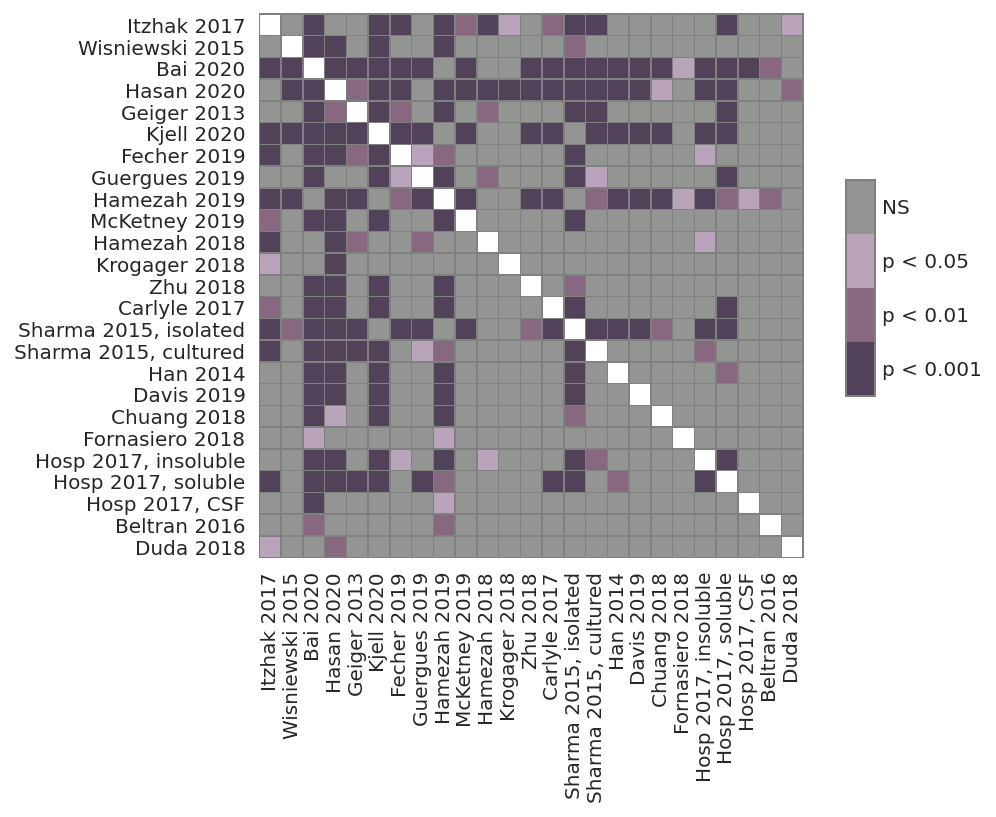

In [15]:

fig,ax = plt.subplots(figsize=(5, 5))

cmap = ['1', '#929591','#524259','#876880', '#baa4bb']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.95, 0.35, 0.04, 0.3]}
ax = sp.sign_plot(studies_log_conover_holm, **heatmap_args)

plt.show()

#fig.savefig('../plots/S1E_studies_log_conover_holm_styled_14july2020.svg', transparent=True)
#fig.savefig('../plots/S1E_studies_log_conover_holm_styled_14july2020.png', dpi=300, transparent=True)



In [8]:
# for consistency, let's have also all the data from mgi jax GO  http://www.informatics.jax.org/vocab/gene_ontology

# GO glycolysis
jaxGlycol = pd.read_csv('../data/glycolysis_mgi_jax_go_24april2019_1048.txt',sep='\t')

jaxGlycol = jaxGlycol.drop(columns=['Reference(s)'])
jaxGlycol = jaxGlycol.reset_index()
jaxGlycol.columns = ['MGI Gene/Marker ID', 'Symbol', 'Name', 'Chr', 'Qualifier','Annotated Term', 'Context', 'Proteoform', 'Evidence', 'Inferred From','Reference(s)']
jaxGlycol['Symbol'] = jaxGlycol['Symbol'].str.upper()
jaxGlycol['Symbol'] = jaxGlycol['Symbol'].str.split(' ')
jaxGlycol = split_df_column_list_to_multiple_rows(jaxGlycol, target_column='Symbol')
jaxGlycol = jaxGlycol.drop(columns=['MGI Gene/Marker ID','Chr', 'Context', 'Evidence', 'Inferred From', 'Name', 'Proteoform', 'Qualifier', 'Reference(s)']).drop_duplicates().reset_index(drop=True)
jaxGlycol['functional category'] = 'glycolysis' #'glycolysis by Jax MGI'
print('GO Glycolysis: ',len(jaxGlycol))
### GO mito
jaxMito = pd.read_csv('../data/mito_allGenes_mgi_jax_go_24april2019_1048.txt',sep='\t')
jaxMito = jaxMito.drop(columns=['Reference(s)'])
jaxMito = jaxMito.reset_index()
jaxMito.columns = ['MGI Gene/Marker ID', 'Symbol', 'Name', 'Chr', 'Qualifier','Annotated Term', 'Context', 'Proteoform', 'Evidence', 'Inferred From','Reference(s)']
jaxMito['Symbol'] = jaxMito['Symbol'].str.upper()
jaxMito['Symbol'] = jaxMito['Symbol'].str.split(' ')
jaxMito = split_df_column_list_to_multiple_rows(jaxMito, target_column='Symbol')
jaxMito = jaxMito.drop(columns=['MGI Gene/Marker ID','Chr', 'Context', 'Evidence', 'Inferred From', 'Name', 'Proteoform', 'Qualifier', 'Reference(s)']).drop_duplicates().reset_index(drop=True)
jaxMito['functional category'] = 'mitochondria' # by Jax MGI'
print('GO mito: ',len(jaxMito))
###
### GO OXPHOS
jaxOxphos = pd.read_csv('../data/oxphos_mgi_jax_go_24april2019_1048.txt',sep='\t')
jaxOxphos = jaxOxphos.drop(columns=['Reference(s)'])
jaxOxphos = jaxOxphos.reset_index()
jaxOxphos.columns = ['MGI Gene/Marker ID', 'Symbol', 'Name', 'Chr', 'Qualifier','Annotated Term', 'Context', 'Proteoform', 'Evidence', 'Inferred From','Reference(s)']
jaxOxphos['Symbol'] = jaxOxphos['Symbol'].str.upper()
jaxOxphos['Symbol'] = jaxOxphos['Symbol'].str.split(' ')
jaxOxphos = split_df_column_list_to_multiple_rows(jaxOxphos, target_column='Symbol')
jaxOxphos = jaxOxphos.drop(columns=['MGI Gene/Marker ID','Chr', 'Context', 'Evidence', 'Inferred From', 'Name', 'Proteoform', 'Qualifier', 'Reference(s)']).drop_duplicates().reset_index(drop=True)
jaxOxphos['functional category'] = 'oxidative phosphorylation' # by Jax MGI'
print('GO OXPHOS: ',len(jaxOxphos))
###
# GO LAC == lactate metabolic process
jaxLac = pd.read_csv('../data/lactate_mgi_jax_go_24april2019_1048.txt',sep='\t') 
jaxLac = jaxLac.drop(columns=['Reference(s)'])
jaxLac = jaxLac.reset_index()
jaxLac.columns = ['MGI Gene/Marker ID', 'Symbol', 'Name', 'Chr', 'Qualifier','Annotated Term', 'Context', 'Proteoform', 'Evidence', 'Inferred From','Reference(s)']
jaxLac['Symbol'] = jaxLac['Symbol'].str.upper()
jaxLac['Symbol'] = jaxLac['Symbol'].str.split(' ')
jaxLac = split_df_column_list_to_multiple_rows(jaxLac, target_column='Symbol')
jaxLac = jaxLac.drop(columns=['MGI Gene/Marker ID','Chr', 'Context', 'Evidence', 'Inferred From', 'Name', 'Proteoform', 'Qualifier', 'Reference(s)']).drop_duplicates().reset_index(drop=True)
jaxLac['functional category'] = 'lactate metabolic process' # by Jax MGI'
print('GO Lactate: ',len(jaxLac))
###

#######
# DNA repair
# http://www.informatics.jax.org/go/term/GO:0006281  
dnarep = pd.read_csv('../data/jax_dnaRepairGenesByGO.txt',sep='\t')
dnarep = dnarep.drop(columns=['Reference(s)'])
dnarep = dnarep.reset_index()
dnarep.columns = ['MGI Gene/Marker ID', 'Symbol', 'Name', 'Chr', 'Qualifier','Annotated Term', 'Context', 'Proteoform', 'Evidence', 'Inferred From','Reference(s)']
dnarep['Symbol'] = dnarep['Symbol'].str.upper()
dnarep['Symbol'] = dnarep['Symbol'].str.split(' ')
dnarep = split_df_column_list_to_multiple_rows(dnarep, target_column='Symbol')
dnarep = dnarep.drop(columns=['MGI Gene/Marker ID','Chr', 'Context', 'Evidence', 'Inferred From', 'Name', 'Proteoform', 'Qualifier', 'Reference(s)']).drop_duplicates().reset_index(drop=True)
dnarep['functional category'] = 'DNA repair' # by Jax MGI'
print('DNA repair: ',len(dnarep))

###
# oxid stress response
# from http://www.informatics.jax.org/go/term/GO:0006979
osr = pd.read_csv('../data/jax_mgi_oxidStressResponse_ByGO_report.txt',sep='\t')
#osr = pd.read_csv('/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/ProteinRULES/oxidStressResponse/jax_mgi_oxidStressResponse_ByGO_report.txt',sep='\t')
osr = osr.drop(columns=['Reference(s)'])
osr = osr.reset_index()
osr.columns = ['MGI Gene/Marker ID', 'Symbol', 'Name', 'Chr', 'Qualifier','Annotated Term', 'Context', 'Proteoform', 'Evidence', 'Inferred From', 'Reference(s)']
osr['Symbol'] = osr['Symbol'].str.upper()
osr['Symbol'] = osr['Symbol'].str.split(' ')
osr = split_df_column_list_to_multiple_rows(osr, target_column='Symbol')
osr = osr.drop(columns=['MGI Gene/Marker ID', 'Chr', 'Context', 'Evidence', 'Inferred From', 'Name', 'Proteoform', 'Qualifier', 'Reference(s)']).drop_duplicates().reset_index(drop=True)
osr['functional category'] = 'oxidative stress response' # by Jax MGI'
print('oxid stress response: ',len(osr))
###

GO Glycolysis:  100
GO mito:  3068
GO OXPHOS:  106
GO Lactate:  23
DNA repair:  966
oxid stress response:  549


In [9]:
fun_groups = pd.concat([jaxGlycol,jaxMito,jaxOxphos,jaxLac,dnarep,osr]).reset_index(drop=True)

print(len(fun_groups))

fun_groups = fun_groups.drop(columns=['Annotated Term'])
fun_groups = fun_groups.drop_duplicates(keep='first')
fun_groups = fun_groups.reset_index(drop=True)

print(len(fun_groups))


4812
2875


In [10]:
fun_df = pd.merge(fun_groups, df, how='inner', left_on='Symbol', right_on='gene_id_final')

mypalfunhex = sns.color_palette("BuPu", 6).as_hex() # len(fun_df['functional category'].unique() = 6

mypalfun = {'glycolysis':mypalfunhex[1], 'oxidative phosphorylation':mypalfunhex[4], 'lactate metabolic process':mypalfunhex[2],
       'mitochondria':mypalfunhex[3], 'oxidative stress response':mypalfunhex[5],
       'DNA repair':mypalfunhex[0]}

In [12]:
fun_df.columns

Index(['Symbol', 'functional category', 'gene_names', 'Uniprot', 'Study',
       'Organism', 'location', 'Age_cat', 'Age_days', 'condition', 'sample_id',
       'molecular_weight_kDa', 'raw_data', 'raw_data_units',
       'gene_name_unified', 'Uniprot_unified', 'gene_id_final', 'log_raw_data',
       'uniprot_from_gn', 'Uniprot_final', 'TheorPepNum', 'conc_uM',
       'log_conc_uM', 'copyNum', 'totalProtein', 'totalVolume',
       'sample_full_id', 'compound_gene_protein_id', 'row_id', 'row_gene_id',
       'gene_id_dd', 'log_conc_uM_medNorm', 'exp_conc'],
      dtype='object')

In [13]:
print(len(fun_df))
fun_df = fun_df[['functional category', 'Study', 'Organism', 'location', 'Age_cat',
       'condition', 'log_conc_uM_medNorm', 'exp_conc']]

fun_df = fun_df.drop_duplicates(keep='first')
fun_df = fun_df.reset_index(drop=True)

print(len(fun_df))

426226
425644


In [26]:
fun_df.columns

Index(['functional category', 'Study', 'Organism', 'location', 'Age_cat',
       'condition', 'log_conc_uM_medNorm', 'exp_conc'],
      dtype='object')

In [27]:
fun_df['Age_cat'].unique()

array(['adult', 'mature adult', 'embr', 'middle-aged', 'young', 'old',
       'adolescence', 'child', 'post-mortem'], dtype=object)

In [29]:
fun_df['condition'].unique()

array([nan, 'control', 'WT', 'SORT', 'adult', 'young'], dtype=object)

In [30]:
fun_df.loc[(fun_df['condition'].isin(['control', 'WT', 'SORT', 'adult', 'young'])) | (fun_df['condition'].isna()),'condition'].unique()

array([nan, 'control', 'WT', 'SORT', 'adult', 'young'], dtype=object)

In [31]:
fun_df[fun_df['location'].isin(['astrocytes'])]['Study'].unique()

array(['Sharma 2015, isolated', 'Sharma 2015, cultured', 'Han 2014'],
      dtype=object)

In [32]:
fun_df[fun_df['location'].isin(['neurons'])]['Study'].unique()

array(['Sharma 2015, isolated', 'Sharma 2015, cultured', 'Krogager 2018',
       'Davis 2019', 'Chuang 2018'], dtype=object)

In [33]:
fun_df['functional category'].unique()

array(['glycolysis', 'oxidative phosphorylation',
       'lactate metabolic process', 'mitochondria',
       'oxidative stress response', 'DNA repair'], dtype=object)

In [34]:
fun_df['location'].unique()

array(['brain', 'spinal cord', 'cerebellum', 'midbrain', 'olfactory bulb',
       'medulla', 'cortex', 'mitochondria', 'striatum', 'er', 'brainstem',
       'hippocampus', 'subependymal zone', 'medial subependymal zone',
       'microglia', 'thalamus', 'amygdala', 'astrocytes', 'neurons',
       'optic nerve', 'corpus callosum', 'oligodendrocytes',
       'large protein complex', 'axon', 'csf', 'cytoplasm',
       'subcellular not specified', 'plasma membrane', 'nucleus',
       'actin binding proteins', 'endosome', 'lysosome', 'peroxisome',
       'golgi'], dtype=object)

In [35]:
fun_df['Organism'].unique()

array(['mouse', 'human', 'rat'], dtype=object)

In [36]:
fun_df['Study'].unique()

array(['Wisniewski 2015', 'Hasan 2020', 'Geiger 2013', 'Fecher 2019',
       'Sharma 2015, isolated', 'Itzhak 2017', 'Bai 2020', 'Kjell 2020',
       'Guergues 2019', 'McKetney 2019', 'Sharma 2015, cultured',
       'Han 2014', 'Hosp 2017, soluble', 'Beltran 2016', 'Hamezah 2019',
       'Hamezah 2018', 'Krogager 2018', 'Zhu 2018', 'Carlyle 2017',
       'Davis 2019', 'Chuang 2018', 'Fornasiero 2018',
       'Hosp 2017, insoluble', 'Hosp 2017, CSF', 'Duda 2018'],
      dtype=object)

In [37]:
fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='cortex'), ['Age_cat','log_conc_uM_medNorm']].groupby('Age_cat').describe()


log_conc_uM_medNorm                                          \
                           count      mean       std       min       25%   
Age_cat                                                                    
adult                     6866.0 -1.639984  2.404944 -8.941722 -3.537489   
child                     1650.0 -1.180769  2.608569 -6.409877 -3.403964   
mature adult              1847.0 -1.856840  2.059014 -8.979197 -3.480501   
middle-aged                687.0 -1.718969  2.050044 -6.162274 -3.406317   
old                         46.0 -1.852180  1.654286 -5.339906 -2.979782   
young                     1215.0 -1.756037  2.103239 -7.159962 -3.385797   

                                            
                   50%       75%       max  
Age_cat                                     
adult        -1.664493  0.111972  5.101027  
child        -1.125432  0.863343  4.970039  
mature adult -1.908877 -0.473114  4.214390  
middle-aged  -1.995637 -0.400147  4.091192  
old          -1.975146 -0.582626  1.572250  
young        -1.817247 -0.289647  3.895897

In [38]:
fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location'].isin(['striatum', 'brain', 'medulla', 'cerebellum', 'cortex',
       'midbrain', 'olfactory bulb', 'hippocampus', 'brainstem', 'thalamus','amygdala'])),'Study'].unique()

array(['Sharma 2015, isolated', 'Wisniewski 2015', 'Bai 2020',
       'Hasan 2020', 'Hosp 2017, soluble', 'Geiger 2013', 'Kjell 2020',
       'McKetney 2019', 'Carlyle 2017', 'Hamezah 2019', 'Krogager 2018',
       'Hosp 2017, insoluble', 'Hamezah 2018', 'Zhu 2018',
       'Fornasiero 2018', 'Duda 2018'], dtype=object)

In [39]:
fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location'].isin(['striatum', 'brain', 'medulla', 'cerebellum', 'cortex',
       'midbrain', 'olfactory bulb', 'hippocampus', 'brainstem', 'thalamus','amygdala']))&(fun_df['Age_cat']=='old'),'Study'].unique()

array(['Hamezah 2018'], dtype=object)

In [40]:
fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location'].isin(['striatum', 'brain', 'medulla', 'cerebellum', 'cortex',
       'midbrain', 'olfactory bulb', 'hippocampus', 'brainstem', 'thalamus','amygdala']))&(fun_df['Age_cat']=='young'),'Study'].unique()

array(['Sharma 2015, isolated', 'Hosp 2017, soluble',
       'Hosp 2017, insoluble', 'Zhu 2018', 'Duda 2018'], dtype=object)

In [41]:
fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location'].isin(['striatum', 'brain', 'medulla', 'cerebellum', 'cortex',
       'midbrain', 'olfactory bulb', 'hippocampus', 'brainstem', 'thalamus','amygdala'])),['Age_cat','location','log_conc_uM_medNorm','Study']].groupby(['Age_cat','location','Study']).describe()

log_conc_uM_medNorm  \
                                                                count   
Age_cat      location       Study                                       
adolescence  amygdala       Carlyle 2017                        330.0   
adult        amygdala       Carlyle 2017                        825.0   
                            McKetney 2019                       238.0   
             brain          Sharma 2015, isolated               237.0   
                            Wisniewski 2015                     592.0   
             brainstem      Sharma 2015, isolated               228.0   
             cerebellum     Carlyle 2017                        990.0   
                            Geiger 2013                         176.0   
                            Hosp 2017, insoluble                159.0   
                            Hosp 2017, soluble                 1344.0   
                            McKetney 2019                       212.0   
                            Sharma 2015, isolated               232.0   
             cortex         Bai 2020                            536.0   
                            Carlyle 2017                       1980.0   
                            Fornasiero 2018                      71.0   
                            Geiger 2013                         163.0   
                            Hamezah 2018                         46.0   
                            Hosp 2017, insoluble                139.0   
                            Hosp 2017, soluble                 1372.0   
                            Kjell 2020                          882.0   
                            McKetney 2019                      1219.0   
                            Sharma 2015, isolated               458.0   
             hippocampus    Carlyle 2017                        990.0   
                            Hamezah 2018                         54.0   
                            Hosp 2017, insoluble                138.0   
                            Hosp 2017, soluble                 1295.0   
                            Sharma 2015, isolated               225.0   
             medulla        Geiger 2013                         167.0   
             midbrain       Geiger 2013                         164.0   
             olfactory bulb Geiger 2013                         165.0   
                            Kjell 2020                          882.0   
                            Sharma 2015, isolated               239.0   
             striatum       Carlyle 2017                        990.0   
                            Hamezah 2018                          7.0   
                            Hosp 2017, insoluble                157.0   
                            Hosp 2017, soluble                 1355.0   
                            Krogager 2018                        85.0   
                            McKetney 2019                       237.0   
                            Sharma 2015, isolated               239.0   
             thalamus       Carlyle 2017                        825.0   
                            McKetney 2019                       240.0   
                            Sharma 2015, isolated               229.0   
child        amygdala       Carlyle 2017                        825.0   
             cerebellum     Carlyle 2017                        825.0   
             cortex         Carlyle 2017                       1650.0   
             hippocampus    Carlyle 2017                        825.0   
             striatum       Carlyle 2017                        825.0   
             thalamus       Carlyle 2017                        825.0   
mature adult brainstem      Hasan 2020                          573.0   
             cerebellum     Hasan 2020                          690.0   
             cortex         Bai 2020                           1072.0   
                            Hamezah 2018                         46.0   
                            Hasan 2

### Neurons vs Astrocytes (OSR)

In [14]:
# without organism filter

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')]['exp_conc']


print('length neurons: ', len(data1), 'length astrocytes: ', len(data2))

length neurons:  3624 length astrocytes:  2590


In [16]:
# c
fun_df.loc[(fun_df['functional category'].isin(['oxidative stress response']))&
       (fun_df['location'].isin(['neurons','astrocytes']))& (fun_df['Organism']=='mouse'),['location','log_conc_uM_medNorm']].groupby('location').describe()

log_conc_uM_medNorm                                          \
                         count      mean       std       min       25%   
location                                                                 
astrocytes              2590.0 -1.642500  2.156536 -7.928084 -3.172400   
neurons                 3624.0 -1.822704  2.039250 -8.568437 -3.312831   

                                          
                 50%       75%       max  
location                                  
astrocytes -1.737866  0.000777  4.433237  
neurons    -1.859545 -0.317624  4.388022

In [43]:
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Study'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes'),'Study'].unique())

print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Age_cat'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes'),'Age_cat'].unique())

print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Organism'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes'),'Organism'].unique())

print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'condition'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes'),'condition'].unique())


['Sharma 2015, isolated' 'Sharma 2015, cultured' 'Davis 2019'
 'Chuang 2018' 'Krogager 2018']
['Sharma 2015, isolated' 'Sharma 2015, cultured' 'Han 2014']
['young' 'embr' 'post-mortem' 'adult']
['young' 'embr']
['mouse' 'human' 'rat']
['mouse']
[nan 'SORT']
[nan]


In [44]:
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons') & (fun_df['Organism']=='mouse'),'Study'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse'),'Study'].unique())

print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse'),'Age_cat'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse'),'Age_cat'].unique())

print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse'),'condition'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse'),'condition'].unique())


['Sharma 2015, isolated' 'Sharma 2015, cultured' 'Krogager 2018']
['Sharma 2015, isolated' 'Sharma 2015, cultured' 'Han 2014']
['young' 'embr' 'adult']
['young' 'embr']
[nan 'SORT']
[nan]


In [45]:
fun_df.columns

Index(['functional category', 'Study', 'Organism', 'location', 'Age_cat',
       'condition', 'log_conc_uM_medNorm', 'exp_conc'],
      dtype='object')

In [17]:

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['exp_conc']


print('length neurons: ', len(data1), 'length astrocytes: ', len(data2))


length neurons:  2166 length astrocytes:  2590


In [46]:
# Levene
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['exp_conc']

value, pvalue = levene(data1,data2, center='median')


print(value, pvalue)

if pvalue > 0.05:
    print('Levene: same variances (fail to reject H0)')
else:
    print('Levene: diff variances (reject H0)')




7.639639011927468 0.005731928985823865
Levene: diff variances (reject H0)


In [47]:
# Levene
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']

value, pvalue = levene(data1,data2, center='median')


print(value, pvalue)

if pvalue > 0.05:
    print('Levene: same variances (fail to reject H0)')
else:
    print('Levene: diff variances (reject H0)')



1.7320813425558577 0.18820876288352462
Levene: same variances (fail to reject H0)


In [48]:
# fligner
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['exp_conc']

value, pvalue = fligner(data1,data2, center='median')


print("statistic: ",value, "p-value: ",pvalue)

if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')





statistic:  61.370797957807184 p-value:  4.727707657297466e-15
Conclusion: diff variances (reject H0)


In [49]:
# fligner
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']

value, pvalue = fligner(data1,data2, center='median')


print("statistic: ",value, "p-value: ",pvalue)

if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')




statistic:  2.063760291315011 p-value:  0.15083754846106898
Conclusion: same variances (fail to reject H0)


In [50]:
# WMW
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']

# Wilcoxon-Mann-Whitney U test

stat, p = mannwhitneyu(data1, data2,alternative='two-sided') # ,alternative='greater')
#print('Statistics=%.3f, p=%.3f' % (stat, p))

print("statistic: ",stat, "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distributions (reject H0)')
    
###

statistic:  2632721.0 p-value:  0.00025961313881503115
Conclusion: Different distributions (reject H0)


In [51]:
# WMW
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['exp_conc']


# Wilcoxon-Mann-Whitney U test
from scipy.stats import mannwhitneyu


stat, p = mannwhitneyu(data1, data2,alternative='two-sided') # ,alternative='greater')
#print('Statistics=%.3f, p=%.3f' % (stat, p))
print("statistic: ",stat, "p-value: ",p)


alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###


statistic:  2632721.0 p-value:  0.00025961313881503115
Conclusion: Different distribution (reject H0)


In [52]:
# KS
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']


stat, p = ks_2samp(data1, data2) 
#print('Statistics %.6f  p-value: %.6f' % (stat, p))
print("statistic: ",stat, "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  0.05604944081398375 p-value:  0.237722838715555
Conclusion: Same distribution (fail to reject H0)


In [53]:
# KS
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons') & (fun_df['Organism']=='mouse')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes') & (fun_df['Organism']=='mouse')]['exp_conc']


# KS

stat, p = ks_2samp(data1, data2) 
#print('Statistics %.6f  p-value: %.6f' % (stat, p))
print("statistic: ",stat, "p-value: ",p)


alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  0.05604944081398375 p-value:  0.237722838715555
Conclusion: Same distribution (fail to reject H0)


In [54]:
# bootci bootstrap ci 95%

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']

print("Median neurons: ", np.median(data1)," bootci: ", bootci(data1, stat=np.median, alpha=0.05))
print("Median astrocytes: ", np.median(data2)," bootci: ", bootci(data2, stat=np.median, alpha=0.05))

Median neurons:  -1.9589712462706956  bootci:  (-2.0740554752208475, -1.851318639349934)
Median astrocytes:  -1.737866277975371  bootci:  (-1.842584303958032, -1.6039916340545615)


In [55]:
# bootci bootstrap ci 95%

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['exp_conc']


print("Median neurons: ", np.median(data1)," bootci: ", bootci(data1, stat=np.median, alpha=0.05))
print("Median astrocytes: ", np.median(data2)," bootci: ", bootci(data2, stat=np.median, alpha=0.05))

Median neurons:  0.1410034151061884  bootci:  (0.12557452979253061, 0.15628137366418868)
Median astrocytes:  0.17589531383919646  bootci:  (0.15840752348863973, 0.20143736850959815)


In [56]:
# DBM/OVS

# log 
data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['log_conc_uM_medNorm']


median1 = np.median(data1)
median2 = np.median(data2)

lq1 = np.percentile(data1, 25)  
uq1 = np.percentile(data1, 75)  

lq2 = np.percentile(data2, 25)  
uq2 = np.percentile(data2, 75)  

dbm = np.abs(median1-median2)
ovs = np.max([uq1,uq2]) - np.min([lq1,lq2])

dbmovs = 100*(dbm/ovs)

len1 = len(data1)
len2 = len(data2)

print('median1: ', median1,'\n',
      'median2: ', median2,'\n',
      'lq1: ', lq1,'\n',
      'lq2: ', lq2,'\n',
      'uq1: ', uq1,'\n',
      'uq2: ', uq2,'\n',
      
      'DBM: ', dbm,'\n',
      'OVS: ', ovs,'\n',
      
      'DBM/OVS: ', dbmovs,'%\n',
      
      'len 1: ', len1,'\n',
      'len 2: ', len2,'\n'
      
      
     )
# https://stats.stackexchange.com/questions/52632/statistical-grounding-for-difference-between-median-as-a-proportion-of-overall-v

median1:  -1.9589712462706956 
 median2:  -1.737866277975371 
 lq1:  -3.4443432857541882 
 lq2:  -3.172400252662875 
 uq1:  -0.26376678858109104 
 uq2:  0.0007774691386696064 
 DBM:  0.22110496829532456 
 OVS:  3.4451207548928577 
 DBM/OVS:  6.4179163526069445 %
 len 1:  2166 
 len 2:  2590 



In [57]:
# DBM/OVS
#exp

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')& (fun_df['Organism']=='mouse')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='astrocytes')& (fun_df['Organism']=='mouse')]['exp_conc']



median1 = np.median(data1)
median2 = np.median(data2)

lq1 = np.percentile(data1, 25)  
uq1 = np.percentile(data1, 75)  

lq2 = np.percentile(data2, 25)  
uq2 = np.percentile(data2, 75)  

dbm = np.abs(median1-median2)
ovs = np.max([uq1,uq2]) - np.min([lq1,lq2])

dbmovs = 100*(dbm/ovs)

len1 = len(data1)
len2 = len(data2)

print('median1: ', median1,'\n',
      'median2: ', median2,'\n',
      'lq1: ', lq1,'\n',
      'lq2: ', lq2,'\n',
      'uq1: ', uq1,'\n',
      'uq2: ', uq2,'\n',
      
      'DBM: ', dbm,'\n',
      'OVS: ', ovs,'\n',
      
      'DBM/OVS: ', dbmovs,'%\n',
      
      'length 1: ', len1,'\n',
      'length 2: ', len2,'\n'
      
      
     )

median1:  0.1410034151061884 
 median2:  0.17589531383919646 
 lq1:  0.03192572331435598 
 lq2:  0.04190292831001516 
 uq1:  0.76815266592668 
 uq2:  1.0007778726949945 
 DBM:  0.03489189873300805 
 OVS:  0.9688521493806386 
 DBM/OVS:  3.601364641169812 %
 length 1:  2166 
 length 2:  2590 



### OSR vs DNA repair

In [58]:
data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']

print('length OSR: ', len(data1), 'length DNA repair: ', len(data2))

length OSR:  3624 length DNA repair:  2941


In [59]:
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Study'].unique())
print(fun_df.loc[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons'),'Study'].unique())

print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Age_cat'].unique())
print(fun_df.loc[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons'),'Age_cat'].unique())


print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Organism'].unique())
print(fun_df.loc[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons'),'Organism'].unique())


print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'condition'].unique())
print(fun_df.loc[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons'),'condition'].unique())


['Sharma 2015, isolated' 'Sharma 2015, cultured' 'Davis 2019'
 'Chuang 2018' 'Krogager 2018']
['Sharma 2015, isolated' 'Sharma 2015, cultured' 'Krogager 2018'
 'Davis 2019' 'Chuang 2018']
['young' 'embr' 'post-mortem' 'adult']
['young' 'embr' 'adult' 'post-mortem']
['mouse' 'human' 'rat']
['mouse' 'human' 'rat']
[nan 'SORT']
[nan 'SORT']


In [60]:
# Levene
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']

value, pvalue = levene(data1,data2, center='median')


print("statistic: ",value, "p-value: ",pvalue)


if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')




statistic:  2.113351396379696 p-value:  0.14606703886119726
Conclusion: same variances (fail to reject H0)


In [61]:
# Levene
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['exp_conc']

value, pvalue = levene(data1,data2, center='median')

print("statistic: ",value, "p-value: ",pvalue)


if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')





statistic:  0.1249359280736033 p-value:  0.7237528897680839
Conclusion: same variances (fail to reject H0)


In [62]:
# fligner
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']


value, pvalue = fligner(data1,data2, center='median')

print("statistic: ",value, "p-value: ",pvalue)

if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')





statistic:  2.0127072658158 p-value:  0.15598674641459695
Conclusion: same variances (fail to reject H0)


In [63]:
# fligner
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['exp_conc']


value, pvalue = fligner(data1,data2, center='median')

print("statistic: ",value, "p-value: ",pvalue)

if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')






statistic:  263.41934612140545 p-value:  3.084598796384452e-59
Conclusion: diff variances (reject H0)


In [64]:
# WMW
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']


# Wilcoxon-Mann-Whitney U test
from scipy.stats import mannwhitneyu


stat, p = mannwhitneyu(data1, data2,alternative='two-sided') # ,alternative='greater')
#print('Statistics=%.3f, p=%.3f' % (stat, p))
print("statistic: ",stat, "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  6221057.5 p-value:  1.611145059200545e-31
Conclusion: Different distribution (reject H0)


In [65]:
# WMW
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['exp_conc']


# Wilcoxon-Mann-Whitney U test
from scipy.stats import mannwhitneyu


stat, p = mannwhitneyu(data1, data2,alternative='two-sided') # ,alternative='greater')
#print('Statistics=%.3f, p=%.3f' % (stat, p))
print("statistic: ",stat, "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  6221057.5 p-value:  1.611145059200545e-31
Conclusion: Different distribution (reject H0)


In [66]:
# KS
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']


# KS
from scipy.stats import mannwhitneyu


stat, p = ks_2samp(data1, data2) 
#print('Statistics %.6f  p-value: %.6f' % (stat, p))
print("statistic: ",stat, "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  0.13284758454160672 p-value:  1.0
Conclusion: Same distribution (fail to reject H0)


In [67]:
# KS
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['exp_conc']


# KS
from scipy.stats import mannwhitneyu


stat, p = ks_2samp(data1, data2) 
#print('Statistics %.6f  p-value: %.6f' % (stat, p))
print("statistic: ",stat, "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  0.13284758454160672 p-value:  1.0
Conclusion: Same distribution (fail to reject H0)


In [68]:
# bootci bootstrap ci 95%

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']


print("Median OSR: ", np.median(data1)," bootci: ", bootci(data1, stat=np.median, alpha=0.05))
print("Median DNA repair: ", np.median(data2)," bootci: ", bootci(data2, stat=np.median, alpha=0.05))

Median OSR:  -1.8595453223145895  bootci:  (-1.950556395108751, -1.7809467062820543)
Median DNA repair:  -2.564833167414127  bootci:  (-2.662017148105497, -2.4616140556067427)


In [69]:
# bootci bootstrap ci 95%

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['exp_conc']


print("Median OSR: ", np.median(data1)," bootci: ", bootci(data1, stat=np.median, alpha=0.05))
print("Median DNA repair: ", np.median(data2)," bootci: ", bootci(data2, stat=np.median, alpha=0.05))

Median OSR:  0.155743470656256  bootci:  (0.14219926568252214, 0.1683864857746131)
Median DNA repair:  0.07693201513828728  bootci:  (0.06980726803173147, 0.08514320895645117)


In [70]:
# DBM/OVS

# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']



median1 = np.median(data1)
median2 = np.median(data2)

lq1 = np.percentile(data1, 25)  
uq1 = np.percentile(data1, 75)  

lq2 = np.percentile(data2, 25)  
uq2 = np.percentile(data2, 75)  

dbm = np.abs(median1-median2)
ovs = np.max([uq1,uq2]) - np.min([lq1,lq2])

dbmovs = 100*(dbm/ovs)

len1 = len(data1)
len2 = len(data2)

print('median1: ', median1,'\n',
      'median2: ', median2,'\n',
      'lq1: ', lq1,'\n',
      'lq2: ', lq2,'\n',
      'uq1: ', uq1,'\n',
      'uq2: ', uq2,'\n',
      
      'DBM: ', dbm,'\n',
      'OVS: ', ovs,'\n',
      
      'DBM/OVS: ', dbmovs,'%\n',
      
      'length 1: ', len1,'\n',
      'length 2: ', len2,'\n'
      
      
     )

median1:  -1.8595453223145895 
 median2:  -2.564833167414127 
 lq1:  -3.312831494146389 
 lq2:  -3.9175646777852133 
 uq1:  -0.31762402715250143 
 uq2:  -0.9478264622686705 
 DBM:  0.7052878450995377 
 OVS:  3.599940650632712 
 DBM/OVS:  19.591652017251423 %
 length 1:  3624 
 length 2:  2941 



In [71]:
# DBM/OVS

# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='DNA repair')&(fun_df['location']=='neurons')]['exp_conc']



median1 = np.median(data1)
median2 = np.median(data2)

lq1 = np.percentile(data1, 25)  
uq1 = np.percentile(data1, 75)  

lq2 = np.percentile(data2, 25)  
uq2 = np.percentile(data2, 75)  

dbm = np.abs(median1-median2)
ovs = np.max([uq1,uq2]) - np.min([lq1,lq2])

dbmovs = 100*(dbm/ovs)

len1 = len(data1)
len2 = len(data2)

print('median1: ', median1,'\n',
      'median2: ', median2,'\n',
      'lq1: ', lq1,'\n',
      'lq2: ', lq2,'\n',
      'uq1: ', uq1,'\n',
      'uq2: ', uq2,'\n',
      
      'DBM: ', dbm,'\n',
      'OVS: ', ovs,'\n',
      
      'DBM/OVS: ', dbmovs,'%\n',
      
      'length 1: ', len1,'\n',
      'length 2: ', len2,'\n'
      
      
     )

median1:  0.155743470656256 
 median2:  0.07693201513828728 
 lq1:  0.03641293906900884 
 lq2:  0.01988947308768387 
 uq1:  0.727876452028984 
 uq2:  0.3875825338572451 
 DBM:  0.07881145551796871 
 OVS:  0.7079869789413001 
 DBM/OVS:  11.131766241777596 %
 length 1:  3624 
 length 2:  2941 



### OSR vs OXPHOS

In [72]:
data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']



print('length OSR: ', len(data1), 'length OXPHOS: ', len(data2))

length OSR:  3624 length OXPHOS:  1318


In [73]:
print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Study'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons'),'Study'].unique())

print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Age_cat'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons'),'Age_cat'].unique())


print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'Organism'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons'),'Organism'].unique())


print(fun_df.loc[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons'),'condition'].unique())
print(fun_df.loc[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons'),'condition'].unique())


['Sharma 2015, isolated' 'Sharma 2015, cultured' 'Davis 2019'
 'Chuang 2018' 'Krogager 2018']
['Krogager 2018' 'Sharma 2015, isolated' 'Sharma 2015, cultured'
 'Davis 2019' 'Chuang 2018']
['young' 'embr' 'post-mortem' 'adult']
['adult' 'young' 'embr' 'post-mortem']
['mouse' 'human' 'rat']
['mouse' 'human' 'rat']
[nan 'SORT']
['SORT' nan]


In [74]:
# DBM/OVS

# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']



median1 = np.median(data1)
median2 = np.median(data2)

lq1 = np.percentile(data1, 25)  
uq1 = np.percentile(data1, 75)  

lq2 = np.percentile(data2, 25)  
uq2 = np.percentile(data2, 75)  

dbm = np.abs(median1-median2)
ovs = np.max([uq1,uq2]) - np.min([lq1,lq2])

dbmovs = 100*(dbm/ovs)

len1 = len(data1)
len2 = len(data2)

print('median1: ', median1,'\n',
      'median2: ', median2,'\n',
      'lq1: ', lq1,'\n',
      'lq2: ', lq2,'\n',
      'uq1: ', uq1,'\n',
      'uq2: ', uq2,'\n',
      
      'DBM: ', dbm,'\n',
      'OVS: ', ovs,'\n',
      
      'DBM/OVS: ', dbmovs,'%\n',
      
      'length 1: ', len1,'\n',
      'length 2: ', len2,'\n'
      
      
     )

median1:  -1.8595453223145895 
 median2:  -0.34791010142125933 
 lq1:  -3.312831494146389 
 lq2:  -1.7377527382760956 
 uq1:  -0.31762402715250143 
 uq2:  0.898958127480483 
 DBM:  1.5116352208933301 
 OVS:  4.211789621626872 
 DBM/OVS:  35.890568064732456 %
 length 1:  3624 
 length 2:  1318 



In [75]:
# DBM/OVS

# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['exp_conc']



median1 = np.median(data1)
median2 = np.median(data2)

lq1 = np.percentile(data1, 25)  
uq1 = np.percentile(data1, 75)  

lq2 = np.percentile(data2, 25)  
uq2 = np.percentile(data2, 75)  

dbm = np.abs(median1-median2)
ovs = np.max([uq1,uq2]) - np.min([lq1,lq2])

dbmovs = 100*(dbm/ovs)

len1 = len(data1)
len2 = len(data2)

print('median1: ', median1,'\n',
      'median2: ', median2,'\n',
      'lq1: ', lq1,'\n',
      'lq2: ', lq2,'\n',
      'uq1: ', uq1,'\n',
      'uq2: ', uq2,'\n',
      
      'DBM: ', dbm,'\n',
      'OVS: ', ovs,'\n',
      
      'DBM/OVS: ', dbmovs,'%\n',
      
      'length 1: ', len1,'\n',
      'length 2: ', len2,'\n'
      
      
     )

median1:  0.155743470656256 
 median2:  0.7061655219741454 
 lq1:  0.03641293906900884 
 lq2:  0.1759271124923124 
 uq1:  0.727876452028984 
 uq2:  2.457141196526354 
 DBM:  0.5504220513178895 
 OVS:  2.420728257457345 
 DBM/OVS:  22.737870292638092 %
 length 1:  3624 
 length 2:  1318 



In [76]:
# Levene
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']

value, pvalue = levene(data1,data2, center='median')

print("statistic: ",value, "p-value: ",pvalue)


if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')





statistic:  12.998111291127383 p-value:  0.0003148818061242509
Conclusion: diff variances (reject H0)


In [77]:
# Levene
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['exp_conc']

value, pvalue = levene(data1,data2, center='median')


print("statistic: ",value, "p-value: ",pvalue)



if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')






statistic:  70.31884809513392 p-value:  6.510235073621644e-17
Conclusion: diff variances (reject H0)


In [78]:
# fligner
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']


value, pvalue = fligner(data1,data2, center='median')

print("statistic: ",value, "p-value: ",pvalue)


if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')






statistic:  12.777113111459313 p-value:  0.0003508860212709889
Conclusion: diff variances (reject H0)


In [79]:
# fligner
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['exp_conc']


value, pvalue = fligner(data1,data2, center='median')


print("statistic: ",value, "p-value: ",pvalue)


if pvalue > 0.05:
    print('Conclusion: same variances (fail to reject H0)')
else:
    print('Conclusion: diff variances (reject H0)')







statistic:  573.0564655334108 p-value:  1.2146646002056921e-126
Conclusion: diff variances (reject H0)


In [80]:
# WMW
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']


# Wilcoxon-Mann-Whitney U test
from scipy.stats import mannwhitneyu


stat, p = mannwhitneyu(data1, data2,alternative='two-sided') # ,alternative='greater')
#print('Statistics=%.3f, p=%.3f' % (stat, p))
print("statistic: ",stat,  "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  1520538.5 p-value:  3.294073123190668e-85
Conclusion: Different distribution (reject H0)


In [81]:
# WMW
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['exp_conc']


# Wilcoxon-Mann-Whitney U test
from scipy.stats import mannwhitneyu


stat, p = mannwhitneyu(data1, data2,alternative='two-sided') # ,alternative='greater')
#print('Statistics=%.3f, p=%.3f' % (stat, p))
print("statistic: ",stat,  "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  1520538.5 p-value:  3.294073123190668e-85
Conclusion: Different distribution (reject H0)


In [82]:
# WMW
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['exp_conc']


# Wilcoxon-Mann-Whitney U test
from scipy.stats import mannwhitneyu


stat, p = mannwhitneyu(data1, data2,alternative='two-sided') # ,alternative='greater')
#print('Statistics=%.3f, p=%.3f' % (stat, p))
print("statistic: ",stat,  "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  1520538.5 p-value:  3.294073123190668e-85
Conclusion: Different distribution (reject H0)


In [83]:
# KS
# log 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']


stat, p = ks_2samp(data1, data2) 
#print('Statistics %.6f  p-value: %.6f' % (stat, p))
print("statistic: ",stat,  "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  0.2797004123580112 p-value:  4.225069535760658e-66
Conclusion: Different distribution (reject H0)


In [84]:
# KS
# exp 

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['exp_conc']


stat, p = ks_2samp(data1, data2) 
#print('Statistics %.6f  p-value: %.6f' % (stat, p))
print("statistic: ",stat,  "p-value: ",p)

alpha = 0.05
if p > alpha:
    print('Conclusion: Same distribution (fail to reject H0)')
else:
    print('Conclusion: Different distribution (reject H0)')
    
###

statistic:  0.2797004123580112 p-value:  4.225069535760658e-66
Conclusion: Different distribution (reject H0)


In [85]:
# bootci bootstrap ci 95%

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['log_conc_uM_medNorm']


print("Median OSR: ", np.median(data1)," bootci: ", bootci(data1, stat=np.median, alpha=0.05))
print("Median DNA repair: ", np.median(data2)," bootci: ", bootci(data2, stat=np.median, alpha=0.05))

# mistype in print, should be oxidative phosphorylation


Median OSR:  -1.8595453223145895  bootci:  (-1.949821600900456, -1.7808999179182365)
Median DNA repair:  -0.34791010142125933  bootci:  (-0.5019245799870231, -0.23169723244448925)


In [86]:
# bootci bootstrap ci 95%

data1 = fun_df[(fun_df['functional category']=='oxidative stress response')&(fun_df['location']=='neurons')]['exp_conc']
data2 = fun_df[(fun_df['functional category']=='oxidative phosphorylation')&(fun_df['location']=='neurons')]['exp_conc']


print("Median OSR: ", np.median(data1)," bootci: ", bootci(data1, stat=np.median, alpha=0.05))
print("Median DNA repair: ", np.median(data2)," bootci: ", bootci(data2, stat=np.median, alpha=0.05))

# mistype in print, should be oxidative phosphorylation


Median OSR:  0.155743470656256  bootci:  (0.14219926568252214, 0.16837860761506662)
Median DNA repair:  0.7061655219741454  bootci:  (0.6053644655204022, 0.7962506548176059)
